Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights.<br><br> As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.


## Getting Started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("BritishAirlinesReview.csv")
data.head()

,id,Topic,Name,Date,Verified,Text,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
0,0,"""cancel your flight without notice""",B Sherry (United States),23rd May 2023,Not Verified,Top Ten REASONS to not use British Airways To...,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
1,1,"""flights changed with no cost""",William Jackson (Spain),23rd May 2023,Not Verified,Easy check in on the way to Heathrow. The fl...,Couple Leisure,Economy Class,London to Valencia,March 2023,4.0,4.0,NaN,NaN,5.0,NaN,4.0,yes,NaN
2,2,"""Cheap, quick and efficient""",A Warten (Chile),23rd May 2023,Trip Verified,✅ Online check in worked fine. Quick securit...,Solo Leisure,Economy Class,London to Glasgow,May 2023,5.0,5.0,5.0,NaN,5.0,NaN,5.0,yes,A320
3,3,"""the worst major European airline""",E Michaels (United Kingdom),22nd May 2023,Trip Verified,✅ . The BA first lounge at Terminal 5 was a z...,Business,Business Class,London Heathrow to Malaga,May 2023,2.0,2.0,3.0,1.0,1.0,1.0,1.0,no,A320 Finnair
4,4,"""do not think the fare was worth the money""",Steve Bennett (United Kingdom),22nd May 2023,Not Verified,Paid a quick visit to Nice yesterday from Hea...,Couple Leisure,Business Class,London to Nice,May 2023,2.0,3.0,3.0,NaN,4.0,1.0,1.0,no,A319


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3563 non-null   int64  
 1   Topic                   3563 non-null   object 
 2   Name                    3563 non-null   object 
 3   Date                    3563 non-null   object 
 4   Verified                2044 non-null   object 
 5   Text                    3563 non-null   object 
 6   Type Of Traveller       2793 non-null   object 
 7   Seat Type               3561 non-null   object 
 8   Route                   2788 non-null   object 
 9   Date Flown              2785 non-null   object 
 10  Seat Comfort            3459 non-null   float64
 11  Cabin Staff Service     3449 non-null   float64
 12  Food & Beverages        3212 non-null   float64
 13  Inflight Entertainment  2484 non-null   float64
 14  Ground Service          2723 non-null   

In [5]:
# Percentage of missing values per column
for col in data.columns:
    pct_missing = data[col].isnull().sum()
    print(f'{col} - {pct_missing/len(data[col]): .1%}')

id -  0.0%
Topic -  0.0%
Name -  0.0%
Date -  0.0%
Verified -  42.6%
Text -  0.0%
Type Of Traveller -  21.6%
Seat Type -  0.1%
Route -  21.8%
Date Flown -  21.8%
Seat Comfort -  2.9%
Cabin Staff Service -  3.2%
Food & Beverages -  9.9%
Inflight Entertainment -  30.3%
Ground Service -  23.6%
Wifi & Connectivity -  84.3%
Value For Money -  0.0%
Recommended -  0.0%
Aircraft -  48.0%


### Imputing missing values

In [6]:
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[columns] = imputer.fit_transform(data[columns]).round(3)

In [7]:
# Percentage of missing values per column after impute
for col in data.columns:
    pct_missing = data[col].isnull().sum()
    print(f'{col} - {pct_missing/len(data[col]): .1%}')

id -  0.0%
Topic -  0.0%
Name -  0.0%
Date -  0.0%
Verified -  42.6%
Text -  0.0%
Type Of Traveller -  21.6%
Seat Type -  0.1%
Route -  21.8%
Date Flown -  21.8%
Seat Comfort -  0.0%
Cabin Staff Service -  0.0%
Food & Beverages -  0.0%
Inflight Entertainment -  0.0%
Ground Service -  0.0%
Wifi & Connectivity -  0.0%
Value For Money -  0.0%
Recommended -  0.0%
Aircraft -  48.0%


### Droping duplicate values

In [8]:
data = data.drop_duplicates(keep="first")
data.duplicated().sum()

0

### Transforming object data into numerical

In [9]:
data['Verified'] = data['Verified'].map({'Trip Verified': 1, 'Not Verified' : 0, np.nan : 0})

In [10]:
cols = ['Seat Type', 'Type Of Traveller', 'Recommended']

def to_numerical(column):
    types = {}
    for i,j in enumerate(data[column].unique()):
        print(i, j)
        types[j] = i
    data[column] = data[column].map(types)
    return data[column]
    
data[cols[0]] = to_numerical(cols[0])

0 Premium Economy
1 Economy Class
2 Business Class
3 First Class
4 nan


In [11]:
# Type of Traveller
data[cols[1]] = to_numerical(cols[1])

0 Couple Leisure
1 Solo Leisure
2 Business
3 Family Leisure
4 nan


In [12]:
# Recommended
data[cols[2]] = to_numerical(cols[2])

0 no
1 yes


In [24]:
data.drop(['Date', 'Text', 'Aircraft'], axis=1)

,id,Topic,Name,Verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,0,"""cancel your flight without notice""",B Sherry (United States),0.0,0,0,Dallas to Madrid via London,May 2023,1.000,1.000,1.00,1.000,1.000,1.000,1.0,0
1,1,"""flights changed with no cost""",William Jackson (Spain),0.0,0,1,London to Valencia,March 2023,4.000,4.000,2.73,2.654,5.000,1.925,4.0,1
2,2,"""Cheap, quick and efficient""",A Warten (Chile),1.0,1,1,London to Glasgow,May 2023,5.000,5.000,5.00,2.654,5.000,1.925,5.0,1
3,3,"""the worst major European airline""",E Michaels (United Kingdom),1.0,2,2,London Heathrow to Malaga,May 2023,2.000,2.000,3.00,1.000,1.000,1.000,1.0,0
4,4,"""do not think the fare was worth the money""",Steve Bennett (United Kingdom),0.0,0,2,London to Nice,May 2023,2.000,3.000,3.00,2.654,4.000,1.000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,3558,British Airways customer review,Michael Dielissen (Canada),0.0,4,0,NaN,NaN,4.000,3.000,3.00,4.000,2.824,1.925,4.0,1
3559,3559,British Airways customer review,Nick Berry (United Kingdom),0.0,4,2,NaN,NaN,4.000,5.000,4.00,2.654,2.824,1.925,3.0,1
3560,3560,British Airways customer review,Avril Barclay (United Kingdom),0.0,4,1,NaN,NaN,2.893,3.272,2.73,2.654,2.824,1.925,4.0,1
3561,3561,British Airways customer review,C Volz (United States),0.0,4,0,NaN,NaN,1.000,3.000,5.00,2.654,2.824,1.925,1.0,0


### Some Insights

<AxesSubplot:xlabel='Seat Comfort', ylabel='count'>

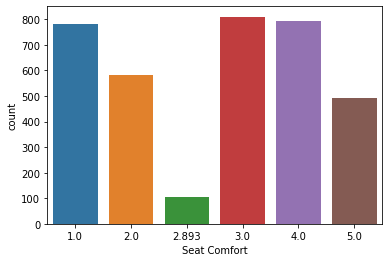

In [12]:
# Data Visualizations
sns.countplot(x=data[columns[0]])

<AxesSubplot:xlabel='Cabin Staff Service', ylabel='count'>

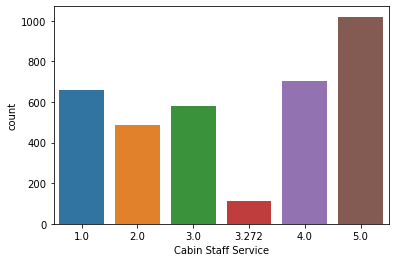

In [13]:
sns.countplot(x=data[columns[1]])

<AxesSubplot:xlabel='Food & Beverages', ylabel='count'>

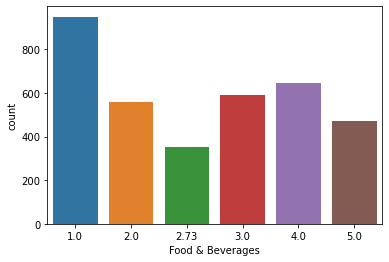

In [14]:
sns.countplot(x=data[columns[2]])

<AxesSubplot:xlabel='Inflight Entertainment', ylabel='count'>

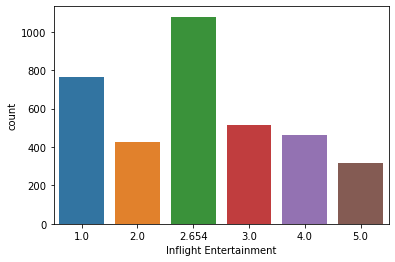

In [15]:
sns.countplot(x=data[columns[3]])

<AxesSubplot:xlabel='Ground Service', ylabel='count'>

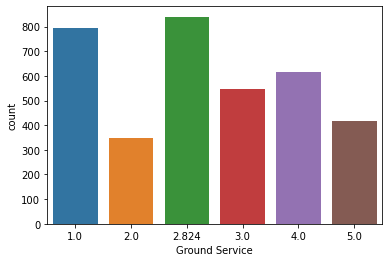

In [16]:
sns.countplot(x=data[columns[4]])

<AxesSubplot:xlabel='Value For Money', ylabel='count'>

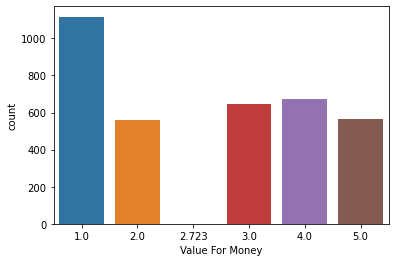

In [18]:
sns.countplot(x=data[columns[6]])

<AxesSubplot:xlabel='Recommended', ylabel='count'>

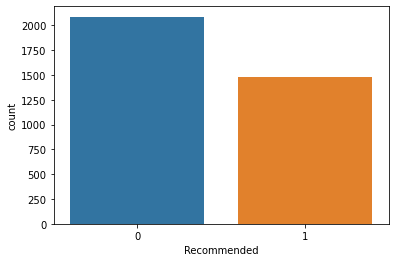

In [19]:
sns.countplot(x=data['Recommended'])

In [16]:
data['Recommended'].value_counts()

0    2086
1    1477
Name: Recommended, dtype: int64

### Insights
The British Airlines (BA) reviews are widely varied. There are both positive and negative reviews about the BA services. The empty data were filled with the average value and graphs presented.
1. The highest rated average service is the cabin staff service (3.000). It seems like BA pilots and flight attendants are the most liked.
2. The least rated average service is the inflight entertainment (2.654), which is above average threshold of 2.5.
3. Though the "value for money" and "Food&Beverages" reviews are comparatively high than "Inflight Entertainment", these sections have the most of 1-star rates. The 3,4,5-star reviews are seemingly uniformly distributed.
4. Overall there are more "Not Recommend" reviews than the other.

<ipython-input-19-17980b2d01c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

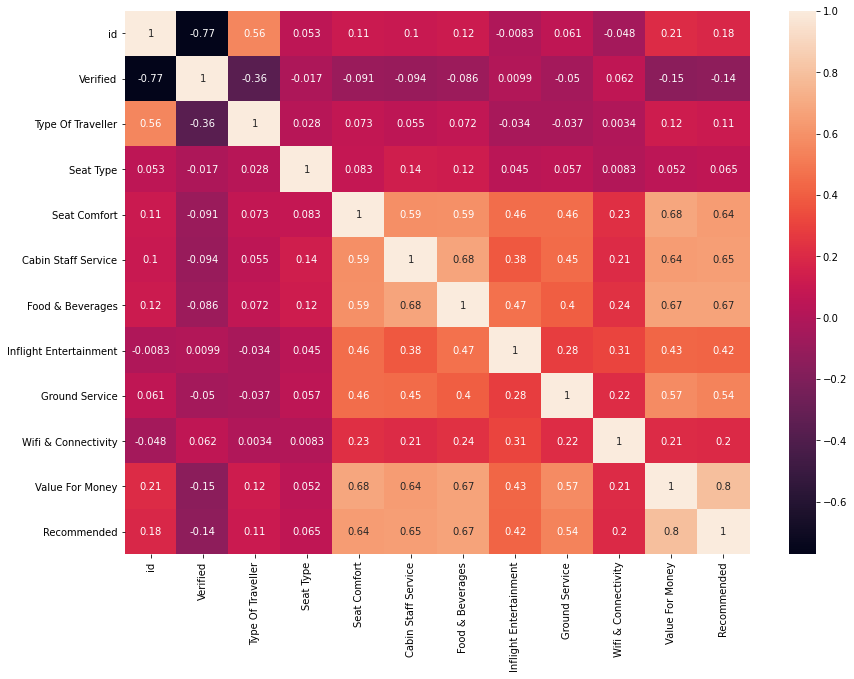

In [19]:
# Additional heatmap of the data correlation
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)

### Insights
1. The most correlated features are "Recommended" and "Value for money". This might be the case that the value for the money for the trip is the most important factor among given. In 80% cases the value for the money rate resulted in recommendation outcome.
2. "Value for money" feature itself is the total sentiment of the other factors. For example, columns "Seat Comfort", "Cabin Staff Service", "Food & Beverage" in 65% of the cases affect to the outcome of the "Value for Money" column.


People's review texts contain more information regarding their flights and the reasons for their decisions. With that notion, wordcloud will be implemented.

In [119]:
x = data[columns + ["Recommended"]].groupby("Recommended").mean()
x.head()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
Recommended,,,,,,,
0,2.165481,2.472767,1.959434,2.236426,2.251256,1.833581,1.735379
1,3.919891,4.400688,3.817773,3.243387,3.633067,2.054164,4.118296


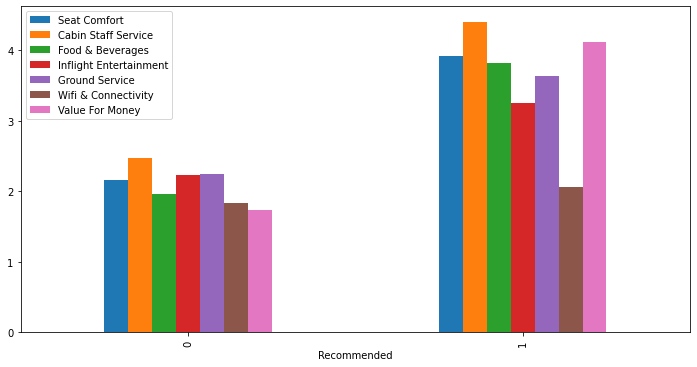

In [134]:
axes = x.plot.bar(figsize=(12,6))

### Insights
1. From the dataframe above it can be seen that both recommended and unrecommended people reviews have similar average rates of "Inflight Entertainment" and "Wifi & Connectivity". Last column, however, had many missing values (84.3%) so it is not that vital.
2. It can be observed that columns "Value For Money" and "Food & Beverages" columns are the factors that divide the people. Since their maximum averages have maximum difference.

### Preprocessing Review Texts

In [79]:
from nltk.corpus import brown, stopwords
from nltk.tokenize import word_tokenize

In [96]:
recommended = data[data['Recommended']==1]
not_recommended = data[data['Recommended']==0]
text_rec = (' '. join(recommended['Text'].to_list()).lower()).split()
text_not_rec = (' '. join(not_recommended['Text'].to_list()).lower()).split()

In [206]:
words_rec = []
words_not_rec = []
stop = stopwords.words('english')
puncs = (',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']')
for i in text_rec:
    if (i not in stop) and (i not in puncs) and (i!='✅'):
        words_rec.append(i)
        
for i in text_not_rec:
    if (i not in stop) and (i not in puncs) and (i!='✅'):
        words_not_rec.append(i)

In [228]:
x = ' '.join(words_rec)
chars = re.escape(string.punctuation)
my_str = re.sub('['+chars+']', '',x)
my_str = re.sub('[^a-zA-Z \n\.]', '', my_str)

In [229]:
y = ' '.join(words_not_rec)
chars = re.escape(string.punctuation)
my_str2 = re.sub('['+chars+']', '',y)
my_str2 = re.sub('[^a-zA-Z \n\.]', '', my_str2)

In [232]:
# most common words of people who recommends BA services
from collections import Counter
token_counts_rec = Counter(words_rec)
token_counts_rec.most_common(10)

[('flight', 1864),
 ('ba', 1163),
 ('good', 1118),
 ('crew', 945),
 ('food', 941),
 ('service', 850),
 ('cabin', 809),
 ('seat', 765),
 ('seats', 662),
 ('time', 634)]

In [104]:
token_counts_not_rec = Counter(words_not_rec)
token_counts_not_rec.most_common(10)

[('flight', 3006),
 ('ba', 2633),
 ('british', 1439),
 ('service', 1293),
 ('seat', 1135),
 ('airways', 1121),
 ('food', 1098),
 ('london', 1079),
 ('one', 1033),
 ('business', 1029)]

### Wordcloud

In [224]:
# WordCloud made in Google Colab
with open('words_recommended.txt', 'w') as f:
    f.write(my_str)
    
with open('words_not_recommended.txt', 'w') as f:
    f.write(my_str2)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud()

with open('words_recommended.txt', 'r') as f:
    x = f.read()
    x = x.replace('flight', '')
    x = x.replace('ba', '')
    x = x.replace('seat', '')
    cloud.generate(x)
    plt.imshow(cloud, interpolation='bilinear')

<img src='wordcloud_recommended.png' align='left'>

In [ ]:
with open('words_not_recommended.txt', 'r') as f:
    x = f.read()
    x = x.replace('flight', '')
    x = x.replace('ba', '')
    x = x.replace('seat', '')
    cloud.generate(x)
    plt.imshow(cloud, interpolation='bilinear')

<img src='wordcloud_not_recommended.png' align='left'>

### Insights
1. Both categories of the reviews have similar words. For example, "food", "service", "time", "return" and others.
2. Most common categorical words for recommended reviews are "time", "good", "hour".
3. For the not recommended reviews the most common words are "business", "london" and "class"

### Recommendation detection

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [55]:
vector = CountVectorizer(analyzer = 'word')
data_vect = vector.fit_transform(data['Text'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_vect, data['Recommended'], test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2672, 13663) (891, 13663)
(2672,) (891,)


In [57]:
nb = MultinomialNB()
r = nb.fit(X_train, y_train)

<AxesSubplot:>

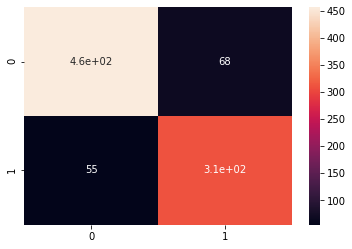

In [58]:
y_predicted = nb.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)

In [59]:
# Naive Bayes Results
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       525
           1       0.82      0.85      0.83       366

    accuracy                           0.86       891
   macro avg       0.86      0.86      0.86       891
weighted avg       0.86      0.86      0.86       891



In [65]:
user_input = ['this trip was amazing. i liked it!']
x = vector.transform(user_input)
y_predicted = nb.predict(x)

In [66]:
print(user_input)
print(y_predicted)


['this trip was amazing. i liked it!']
[1]


In [67]:
user_input = ['I didn\'t like this trip at all. It was waste of money!']
x = vector.transform(user_input)
y_predicted = nb.predict(x)

print(user_input)
print(y_predicted)

["I didn't like this trip at all. It was waste of money!"]
[0]


### Model Results Overview
1. The Multinomial Naive-Bayes works totally fine with binary categorical data. Hence, it performs well on the people's reviews with average recall and f1 scores of 86%.
2. Confusion matrix shows us that there are both False-Positive (Type 1) and True-Negative (Type 2) errors appear. Type 1 errors are more costly and more common for this model errors.
3. Using the following model the review recommendation outcome can be predicted given the review text with the 86% accuracy.

### VADER Sentiment Analysis

In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [70]:
sid.polarity_scores("I am doing analysis of one nice airline")['compound']

0.4215

In [71]:
func = lambda x: sid.polarity_scores(x)['compound']

data['Sentiment'] = data['Text'].map(func)

In [72]:
data_sentiment = data[["Text", "Recommended", "Sentiment"]]
data_sentiment

,Text,Recommended,Sentiment
0,Top Ten REASONS to not use British Airways To...,0,-0.7535
1,Easy check in on the way to Heathrow. The fl...,1,-0.0516
2,✅ Online check in worked fine. Quick securit...,1,0.8479
3,✅ . The BA first lounge at Terminal 5 was a z...,0,-0.1289
4,Paid a quick visit to Nice yesterday from Hea...,0,0.9738
...,...,...,...
3558,YYZ to LHR - July 2012 - I flew overnight in p...,1,0.0933
3559,LHR to HAM. Purser addresses all club passenge...,1,0.8720
3560,My son who had worked for British Airways urge...,1,0.6640
3561,London City-New York JFK via Shannon on A318 b...,0,0.9148


In [76]:
x = data_sentiment[['Recommended', 'Sentiment']].groupby('Recommended')
print("The average sentiments for given categories")
x.mean()

The average sentiments for given categories


,Sentiment
Recommended,
0,-0.229656
1,0.749968


### Insight
1. VADER sentiment analysis results in average sentiments for recommending reviews +0.75 and for the not recommending reviews the sentiment of -0.22, where values -1 means the most negative and +1 meaning the most positive sentiments.